# SUYASH PRATAP SINGH

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [2]:
df= pd.read_csv('data.csv')
df

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1
...,...,...,...
2222,98.714112,89.643117,0
2223,96.633331,91.000000,0
2224,85.673940,103.839270,0
2225,78.958862,78.605371,0


In [3]:
df.corr()

,x1,x2,y
x1,1.000000,0.112683,-0.121294
x2,0.112683,1.000000,0.061546
y,-0.121294,0.061546,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2227 non-null   float64
 1   x2      2227 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


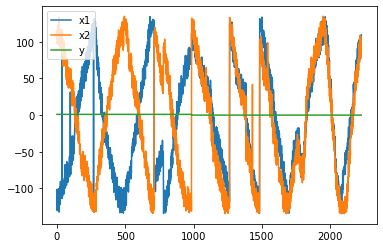

In [5]:
df.plot()

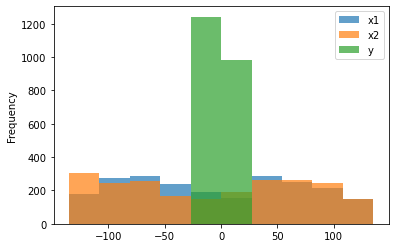

In [6]:
df.plot.hist(alpha=0.7);

(array([182., 276., 284., 236., 192., 157., 288., 250., 209., 153.]),
 array([-1.34369160e+02, -1.07481376e+02, -8.05935909e+01, -5.37058061e+01,
        -2.68180213e+01,  6.97634500e-02,  2.69575482e+01,  5.38453330e+01,
         8.07331178e+01,  1.07620903e+02,  1.34508687e+02]),
 <a list of 10 Patch objects>)

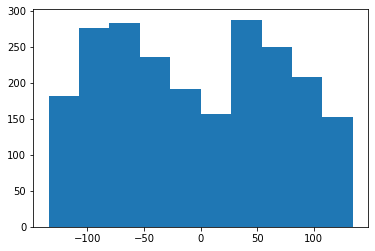

In [7]:
plt.hist(df['x1'], bins= 10)

(array([304., 247., 259., 167., 147., 190., 261., 260., 245., 147.]),
 array([-1.34876132e+02, -1.07895544e+02, -8.09149561e+01, -5.39343681e+01,
        -2.69537801e+01,  2.68079000e-02,  2.70073959e+01,  5.39879839e+01,
         8.09685719e+01,  1.07949160e+02,  1.34929748e+02]),
 <a list of 10 Patch objects>)

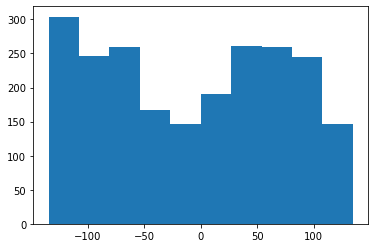

In [8]:
plt.hist(df['x2'], bins = 10)

In [9]:
X = df[['x1', 'x2']].values
y = df.y.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression with Parameter Tuning

In [10]:
from sklearn.linear_model import LogisticRegression
for this_C in ([0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]):
    classifier = LogisticRegression(C = this_C, penalty='l2', solver='liblinear', random_state = 0).fit(X_train, y_train)
    print('this_C = {:.0f}, Accuracy of Logistic regression classifier on training set: {:.2f}'
         .format(this_C, classifier.score(X_train, y_train)))
    print('this_C = {:.0f}, Accuracy of Logistic regression classifier on test set: {:.2f}'
         .format(this_C, classifier.score(X_test, y_test)))

this_C = 0, Accuracy of Logistic regression classifier on training set: 0.73
this_C = 0, Accuracy of Logistic regression classifier on test set: 0.71
this_C = 0, Accuracy of Logistic regression classifier on training set: 0.73
this_C = 0, Accuracy of Logistic regression classifier on test set: 0.71
this_C = 0, Accuracy of Logistic regression classifier on training set: 0.73
this_C = 0, Accuracy of Logistic regression classifier on test set: 0.72
this_C = 0, Accuracy of Logistic regression classifier on training set: 0.74
this_C = 0, Accuracy of Logistic regression classifier on test set: 0.73
this_C = 1, Accuracy of Logistic regression classifier on training set: 0.74
this_C = 1, Accuracy of Logistic regression classifier on test set: 0.73
this_C = 10, Accuracy of Logistic regression classifier on training set: 0.74
this_C = 10, Accuracy of Logistic regression classifier on test set: 0.73
this_C = 100, Accuracy of Logistic regression classifier on training set: 0.74
this_C = 100, Accur

##### Best logistic Regression model

In [11]:
from sklearn.linear_model import LogisticRegression
for this_C in ([100]):
    classifier = LogisticRegression(C = this_C, penalty='l2', solver='liblinear', random_state = 0).fit(X_train, y_train)
    print('this_C = {:.0f}, Accuracy of Logistic regression classifier on training set: {:.2f}'
         .format(this_C, classifier.score(X_train, y_train)))
    print('this_C = {:.0f}, Accuracy of Logistic regression classifier on test set: {:.2f}'
         .format(this_C, classifier.score(X_test, y_test)))

this_C = 100, Accuracy of Logistic regression classifier on training set: 0.74
this_C = 100, Accuracy of Logistic regression classifier on test set: 0.73


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


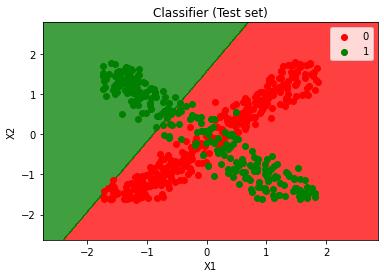

In [12]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [13]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.742515,0.725314
precision,0.980769,0.981132
recall,0.419178,0.407843
f1,0.587332,0.576177


In [14]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[300   2]
 [151 104]]


In [15]:
print(classifier.predict(sc.transform([[35,116]])))

[0]


### SVM linear and RBF Kernel

In [16]:
from sklearn.svm import SVC
for this_C in ([0.001, 0.01, 0.1, 1, 10, 100]):
    for gamma in([.5, 1, 2 ,10]): 
        classifier = SVC(C = this_C, random_state = 0, gamma = gamma, kernel = 'linear').fit(X_train, y_train)
        print('C = {:.5f}, Accuracy of Logistic regression classifier on training set: {:.2f}'
         .format(this_C, classifier.score(X_train, y_train)))
        print('C = {:.5f}, Accuracy of Logistic regression classifier on test set: {:.2f}'
         .format(this_C, classifier.score(X_test, y_test)))

C = 0.00100, Accuracy of Logistic regression classifier on training set: 0.56
C = 0.00100, Accuracy of Logistic regression classifier on test set: 0.54
C = 0.00100, Accuracy of Logistic regression classifier on training set: 0.56
C = 0.00100, Accuracy of Logistic regression classifier on test set: 0.54
C = 0.00100, Accuracy of Logistic regression classifier on training set: 0.56
C = 0.00100, Accuracy of Logistic regression classifier on test set: 0.54
C = 0.00100, Accuracy of Logistic regression classifier on training set: 0.56
C = 0.00100, Accuracy of Logistic regression classifier on test set: 0.54
C = 0.01000, Accuracy of Logistic regression classifier on training set: 0.73
C = 0.01000, Accuracy of Logistic regression classifier on test set: 0.71
C = 0.01000, Accuracy of Logistic regression classifier on training set: 0.73
C = 0.01000, Accuracy of Logistic regression classifier on test set: 0.71
C = 0.01000, Accuracy of Logistic regression classifier on training set: 0.73
C = 0.0100

In [17]:
from sklearn.svm import SVC
for this_C in ([0.001, 0.01, 0.1, 1, 10, 100]):
    for gamma in([.5, 1, 2 ,10]): 
        classifier = SVC(C = this_C, random_state = 0, gamma = gamma, kernel = 'rbf').fit(X_train, y_train)
        print('C = {:.5f}, Accuracy of Logistic regression classifier on training set: {:.2f}'
         .format(this_C, classifier.score(X_train, y_train)))
        print('C = {:.5f}, Accuracy of Logistic regression classifier on test set: {:.2f}'
         .format(this_C, classifier.score(X_test, y_test)))

C = 0.00100, Accuracy of Logistic regression classifier on training set: 0.56
C = 0.00100, Accuracy of Logistic regression classifier on test set: 0.54
C = 0.00100, Accuracy of Logistic regression classifier on training set: 0.56
C = 0.00100, Accuracy of Logistic regression classifier on test set: 0.54
C = 0.00100, Accuracy of Logistic regression classifier on training set: 0.56
C = 0.00100, Accuracy of Logistic regression classifier on test set: 0.54
C = 0.00100, Accuracy of Logistic regression classifier on training set: 0.56
C = 0.00100, Accuracy of Logistic regression classifier on test set: 0.54
C = 0.01000, Accuracy of Logistic regression classifier on training set: 0.91
C = 0.01000, Accuracy of Logistic regression classifier on test set: 0.92
C = 0.01000, Accuracy of Logistic regression classifier on training set: 0.93
C = 0.01000, Accuracy of Logistic regression classifier on test set: 0.92
C = 0.01000, Accuracy of Logistic regression classifier on training set: 0.94
C = 0.0100

###### Best SVM model

In [18]:
from sklearn.svm import SVC
for this_C in ([100]):
    for gamma in([10]): 
        classifier = SVC(C = this_C, random_state = 0, gamma = gamma, kernel = 'rbf').fit(X_train, y_train)
        print('C = {:.5f}, Accuracy of Logistic regression classifier on training set: {:.2f}'
         .format(this_C, classifier.score(X_train, y_train)))
        print('C = {:.5f}, Accuracy of Logistic regression classifier on test set: {:.2f}'
         .format(this_C, classifier.score(X_test, y_test)))

C = 100.00000, Accuracy of Logistic regression classifier on training set: 0.96
C = 100.00000, Accuracy of Logistic regression classifier on test set: 0.96


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


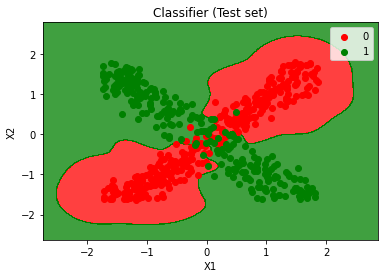

In [19]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [20]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.956886,0.955117
precision,0.948229,0.956349
recall,0.953425,0.945098
f1,0.950820,0.950690


In [21]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[291  11]
 [ 14 241]]


In [22]:
print(classifier.predict(sc.transform([[35,116]])))

[0]


### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt = dt.fit(X_train, y_train)

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=0),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(81, 7)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


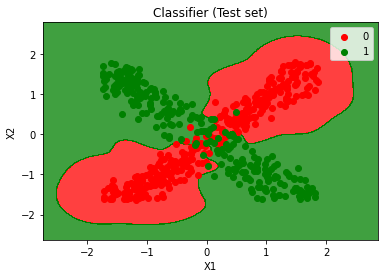

In [25]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [26]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.922801
precision,1.0,0.917323
recall,1.0,0.913725
f1,1.0,0.915521


### KNN

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

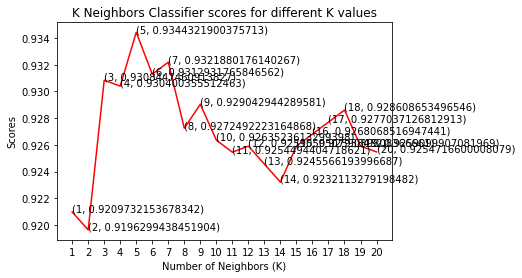

In [27]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())
    
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [28]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.956287,0.949731
precision,0.955617,0.952191
recall,0.943836,0.937255
f1,0.949690,0.944664


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


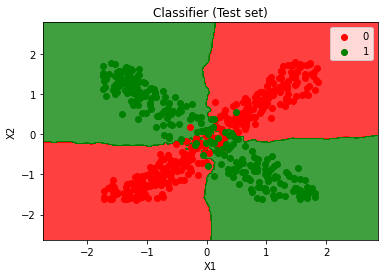

In [29]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# Observations

##### We can see that we have different accuracies for different models. I would like to take SVM rbf kernel for my model building because this model is not overfitting like decision tree and also giving a max accuracy compared to remaining models.

# THANK YOU